[*********************100%***********************]  1 of 1 completed


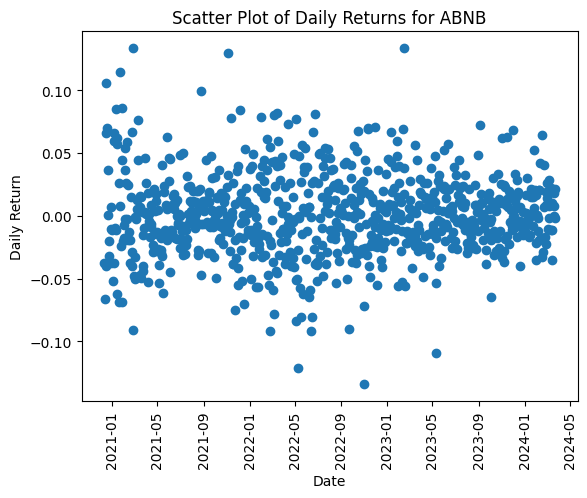

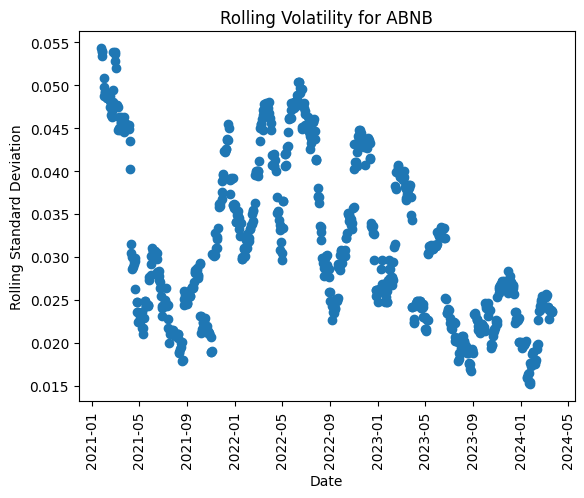

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# Download stock data
ticker = "ABNB"  # Replace with desired ticker symbol
data = yf.download(ticker, period="max")

# Calculate daily returns
data["Returns"] = data["Adj Close"].pct_change()

# Check for heteroscedasticity with a scatter plot
plt.scatter(data.index, data["Returns"])
plt.xlabel("Date")
plt.xticks(rotation=90)  
plt.ylabel("Daily Return")
plt.title("Scatter Plot of Daily Returns for " + ticker)
plt.show()

# Visualize volatility changes over time (may indicate heteroscedasticity)
plt.scatter(data.index, data["Returns"].rolling(window=30).std())
plt.xlabel("Date")
plt.xticks(rotation=90)  
plt.ylabel("Rolling Standard Deviation")
plt.title("Rolling Volatility for " + ticker)
plt.show()

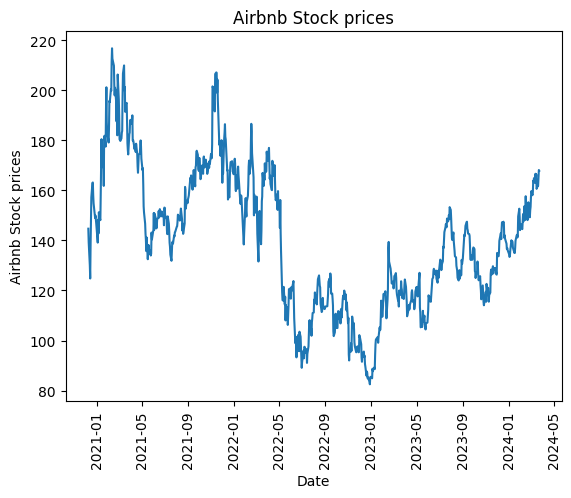

In [2]:
#plot prices
x = data.index
y = data['Adj Close']
plt.plot(x,y)
plt.xlabel("Date")
plt.xticks(rotation=90)  
plt.ylabel("Airbnb Stock prices")
plt.title("Airbnb Stock prices")
plt.show()

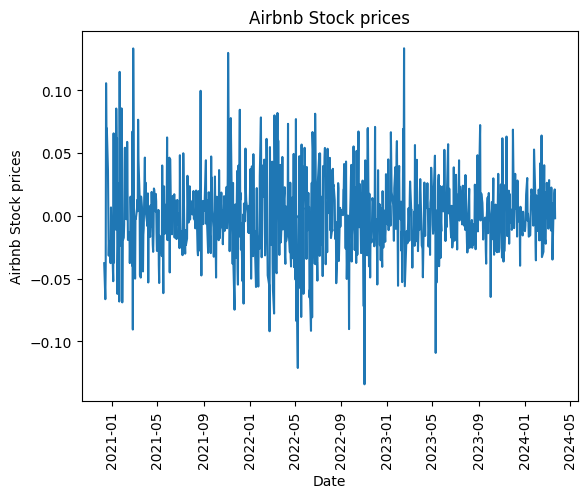

In [3]:
#plot returns
x = data.index
y = data['Returns']
plt.plot(x,y)
plt.xlabel("Date")
plt.xticks(rotation=90)  
plt.ylabel("Airbnb Stock prices")
plt.title("Airbnb Stock prices")
plt.show()

### If the p-value is less than your chosen alpha level (usually 0.05), you would reject the null hypothesis and conclude that your time series is stationary.

In [4]:
result = adfuller(data['Adj Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
print('\n\nPrices are non stationary according to ADF test.\n\n')

ADF Statistic: -2.122481
p-value: 0.235571
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


Prices are non stationary according to ADF test.




In [5]:
result = adfuller(data['Returns'][1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
print('\n\nReturns are stationary according to ADF test.\n\n')

ADF Statistic: -18.077174
p-value: 0.000000
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


Returns are stationary according to ADF test.




In [6]:
result = kpss(data['Adj Close'])
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))
print('\n\nPrices are stationary according to KPSS test.\n\n')

KPSS Statistic: 1.571887
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


Prices are stationary according to KPSS test.




C:\Users\david_4dveiyl\anaconda3\envs\fiz37\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\david_4dveiyl\anaconda3\envs\fiz37\lib\site-packages\statsmodels\tsa\stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [7]:
result = kpss(data['Returns'][1:])
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))
print('\n\nReturns are non stationary according to KPSS test.\n\n')

KPSS Statistic: 0.081327
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


Returns are non stationary according to KPSS test.




C:\Users\david_4dveiyl\anaconda3\envs\fiz37\lib\site-packages\statsmodels\tsa\stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


### One popular non-linear model in financial engineering is the GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model.